In [2]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yamadayuuta/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
def r2_calc(x,y):
    sum_1=0
    sum_2=0
    ave = np.sum(x)/len(x)
    for i in range(0,len(x)):
        sum_1 += (x[i]-y[i])**2
        sum_2 += (x[i]-ave)**2
    
    return 1-sum_1/sum_2


def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)


def prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'Folder/全体.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("FURUKAWA_全体_rank.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)

        kf = KFold(n_splits = 5, shuffle = True)
        count = 0
        for train_index, test_index in kf.split(feature):
            train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

            grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
            grid.fit(train_feature,train_label)

            clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
            clf.fit(train_feature, train_label)
            pred = clf.predict(test_feature)

            if(count==4):
                f.write(str(r2_score(test_label,pred)))
            else:
                f.write(str(r2_score(test_label,pred)))
                f.write(",")
            count += 1
        f.write("\n")
    return 

In [6]:
for i in range(17):
    prediction((i+1)*5)

# これで最後にしよう

# とりあえず訓練データ内で予測結果をプロット 

In [8]:
data=np.loadtxt("Folder/全体.csv",delimiter=",",dtype=float)
max_f=np.zeros(17)
min_f=np.zeros(17)
ave_f=np.zeros(17)

for i in range(17):
    max_f[i] = max(data[i])
    min_f[i] = min(data[i])
    ave_f[i] = sum(data[i])/5

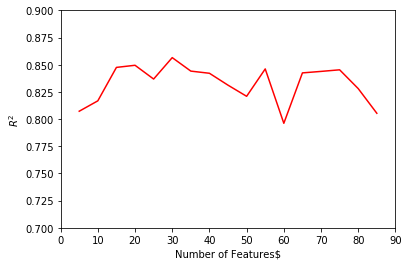

In [55]:
num=np.array(range(5,90,5))
pdf = PdfPages('Folder/all.pdf')


plt.figure()
plt.plot(num,max_f,color="r")
plt.xlim(0, 90)
plt.ylim(0.7, 0.9)

plt.xlabel('Number of Features$')
plt.ylabel('$R^2$')
plt.plot()
pdf.savefig()

pdf.close()

max_f 30個, min_f 35個, ave_f 35個

# 早速やってみる

In [41]:
train_data=np.loadtxt("FURUKAWA_全体_rank.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:30]
train_label=train_data[:,-1]

test_data=np.loadtxt("WANG全体_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:30]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

In [14]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]

In [ ]:
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)

In [42]:
reg=SVR(C=64,kernel="rbf",gamma=0.0078125)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

In [43]:
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

パラメータ: rbf, C 64, gamma 0.0078125
SVR: r2 -0.133453, RMSE 0.957970, r 0.710889


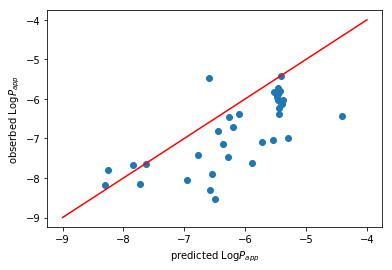

In [44]:
pdf = PdfPages('Folder/全体.pdf')

plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="r")      


y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()


pdf.savefig()

pdf.close()



print("パラメータ: rbf, C 64, gamma 0.0078125")
print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

In [31]:
len(pred)

36

In [10]:
file=open("考察資料＿全体.csv","w")
for i in range(54):
    file.write(str(i+1))
    file.write(",")
    file.write(str(pred[i]))
    file.write(",")
    file.write(str(test_label[i]))
    file.write("\n")
file.close()

In [45]:
for i in range(36):
    print(test_label[i],pred[i])

-5.79 -5.435515518736953
-7.05 -5.550330084830638
-6.11 -5.412743710519205
-6.12 -5.401747233442425
-5.89 -5.472866621507494
-6.02 -5.385937734591085
-5.82 -5.466868540895958
-5.88 -5.460164340008017
-6.24 -5.44700730282847
-5.42 -5.414548271660683
-5.95 -5.479176891239435
-5.73 -5.458166471958386
-5.82 -5.526265757031319
-5.48 -6.5954283592140275
-6.72 -6.199585871318433
-6.39 -6.099577533985878
-7.1 -5.724536564042419
-8.3 -6.578592121395243
-7.62 -5.885023702822281
-6.46 -6.265366093771556
-6.81 -6.440539205081583
-7.15 -6.360838929652731
-6.03 -5.468223417713473
-7.47 -6.285290808679402
-7.0 -5.302754259668156
-6.39 -5.445701815875093
-6.43 -4.406311686125722
-7.89 -6.552167075913738
-8.52 -6.49970648074103
-7.43 -6.78270568930253
-8.05 -6.952170018762987
-7.64 -7.6323793495995
-8.17 -8.30798924891227
-7.8 -8.252577267382113
-7.68 -7.83878547495925
-8.15 -7.726093767629537


In [55]:
pred[9]

-5.414548271660683

In [50]:
test_feature[26]

array([ 0.43873227, -0.59897722,  2.39560438, -0.81286668,  0.70415676,
        1.20357821, -1.79213438,  0.9486675 ,  1.66270152,  0.82161791,
       -0.13273175, -1.36693892, -1.02476197, -1.18758749, -0.83409779,
       -0.53702488, -1.05141386,  0.6176224 ,  1.06938119,  0.57637264,
       -0.23402107,  1.35371777,  1.21294955,  0.78500429,  0.81537234,
        2.24921483, -1.95346416,  0.96013802, -1.81383628, -0.38956345])

In [53]:
test_feature[31]

array([-2.39594479,  1.48428051,  0.53982024, -1.74293124, -1.52968829,
        1.3824711 , -2.29184615,  0.86564589,  0.29509464,  1.45832102,
        2.31386969,  0.0710967 , -1.39775972,  0.75122402, -1.44079704,
       -1.0064565 , -1.12320883, -2.10941641, -1.29602494,  1.31554595,
       -2.95692453,  1.19661262,  0.9193344 , -1.04883858,  1.11038305,
        1.85202396, -2.15430065,  1.3116726 , -2.3869122 , -1.14711674])

In [56]:
test_feature[9]

array([ 0.49236136, -0.14753617, -0.46461548, -0.75944659,  0.39670646,
       -0.65729434, -0.43284133, -0.71875223, -0.65062432, -0.29941436,
        0.55983057, -0.71848399, -2.6555431 ,  1.48058538,  0.32892826,
       -0.44426633,  0.35006015, -0.27341499, -0.42897227, -0.30955548,
       -0.79901767,  1.03351257, -0.6993364 , -1.19266941, -0.08710063,
       -0.93385622, -1.95346416, -0.08205637,  0.6197872 , -1.41065661])

# 結果
特徴量 30個の時

kernel: rbf, C: 64, gamma: 0.007812

r: 0.639335, r2: -0.295501, RMSE: 0.978711

# 次

In [27]:
train_data=np.loadtxt("FURUKAWA_全体_rank.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:35]
train_label=train_data[:,-1]

test_data=np.loadtxt("WANG全体_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:35]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

In [20]:
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'C': 128, 'gamma': 0.00390625, 'kernel': 'rbf'}


In [28]:
reg=SVR(C=128,kernel="rbf",gamma=0.00390625)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

In [29]:
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

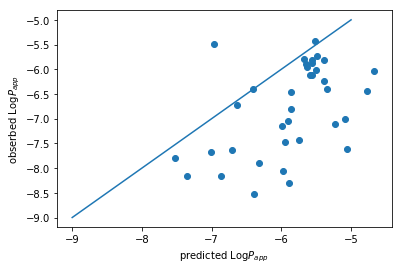

パラメータ: rbf, C 128, gamma 0.00390625
SVR: r2 -0.838711, RMSE 1.220133, r 0.486176


In [30]:
x = np.linspace(-9,-5)  
y = x              
plt.plot(x,y)      

y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.show()
print("パラメータ: rbf, C 128, gamma 0.00390625")
print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

# 結果
特徴量 35個の時

kernel: rbf, C: 128, gamma: 0.003906

r: 0.312417, r2: -1.052648, RMSE: 1.231950
